In [46]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
ds = pd.read_csv('organics_stats.csv', index_col=0)

In [3]:
ds.head()

,Gender,Geographic Region,Loyalty Status,Neighborhood Cluster-7 Level,Affluence Grade,Age,Loyalty Card Tenure,Organics Purchase Count,Organics Purchase Indicator,Total Spend
0,0,0,2,3,5,70,8,1,1,0.02
1,1,0,3,5,10,65,7,1,1,0.01
2,0,0,3,0,11,68,8,0,0,0.01
3,0,0,3,0,11,74,8,0,0,0.01
4,1,1,3,3,13,62,5,0,0,0.01


## Classification Models: predict Organics Purchase Indicator

#### Scalling Data

In [4]:
X = ds.drop(columns=['Organics Purchase Count', 'Organics Purchase Indicator'])
y = ds['Organics Purchase Indicator']

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

#### Splitting Data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=29)

#### Logistic Regression

In [7]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [8]:
# Accuracy:
lr.score(X_test,y_test) * 100

78.65771812080537

In [9]:
# Confusion matrix:
confusion_matrix(y_test, y_pred_lr)

array([[1001,   52],
       [ 266,  171]], dtype=int64)

In [10]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_lr).ravel()
tn, fp, fn, tp

(1001, 52, 266, 171)

In [11]:
# Precision:
tp/(tp+fp)*100

76.68161434977578

In [12]:
# Recall:
tp/(tp+fn)*100

39.130434782608695

In [13]:
# F1:
2*((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))*100

51.81818181818182

#### Decision Tree

In [14]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

In [15]:
# Accuracy:
dtc.score(X_test, y_test)*100

71.34228187919463

In [16]:
# Confusion matrix:
confusion_matrix(y_test, y_pred_dtc)

array([[841, 212],
       [215, 222]], dtype=int64)

In [17]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_dtc).ravel()
tn, fp, fn, tp

(841, 212, 215, 222)

In [18]:
# Precision:
tp/(tp+fp)*100

51.1520737327189

In [19]:
# Recall:
tp/(tp+fn)*100

50.800915331807786

In [20]:
# F1:
2*((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))*100

50.97588978185993

#### Support Vector Machine

In [21]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

C:\Users\nicol\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [22]:
# Accuracy:
svm.score(X_test,y_test)*100

78.79194630872483

In [23]:
# Confusion matrix:
confusion_matrix(y_test, y_pred)

array([[1015,   38],
       [ 278,  159]], dtype=int64)

In [24]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(1015, 38, 278, 159)

In [25]:
# Precision:
tp/(tp+fp)*100

80.71065989847716

In [26]:
# Recall:
tp/(tp+fn)*100

36.38443935926773

In [27]:
# F1:
2*((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))*100

50.1577287066246

#### K-Nearest Neighbour

In [28]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [29]:
# Accuracy:
knn.score(X_test,y_test)*100

75.90604026845638

In [30]:
# Confusion matrix:
confusion_matrix(y_test, y_pred)

array([[952, 101],
       [258, 179]], dtype=int64)

In [31]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(952, 101, 258, 179)

In [32]:
# Precision:
tp/(tp+fp)*100

63.92857142857142

In [33]:
# Recall:
tp/(tp+fn)*100

40.96109839816934

In [34]:
# F1:
2*((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn)))*100

49.930264993026505

### Plotting

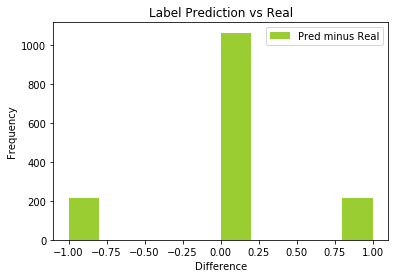

In [35]:
plt.hist(y_pred_dtc - y_test, color='yellowgreen', label='Pred minus Real')
plt.xlabel('Difference')
plt.ylabel('Frequency')
plt.legend()
plt.title('Label Prediction vs Real')
plt.show()

In [36]:
dif = y_test - y_pred_dtc
table = dif.value_counts(normalize=True)
table

 0    0.713423
 1    0.144295
-1    0.142282
Name: Organics Purchase Indicator, dtype: float64

In [37]:
table = pd.DataFrame(table)
table.reset_index(inplace=True)
table

,index,Organics Purchase Indicator
0,0,0.713423
1,1,0.144295
2,-1,0.142282


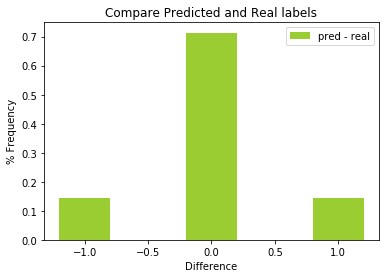

In [58]:
plt.bar(table['index'], table['Organics Purchase Indicator'], width=0.4, color='yellowgreen', label='pred - real')
plt.xlabel('Difference')
plt.ylabel('% Frequency')
plt.legend()
plt.title('Compare Predicted and Real labels')
plt.show()

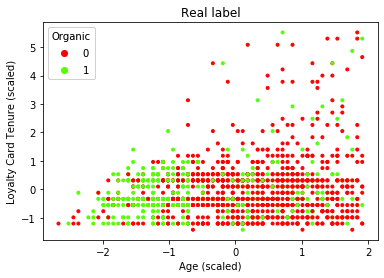

In [39]:
fig, ax = plt.subplots()
scatter = ax.scatter(X_test[:,5], X_test[:,6], c=y_test, cmap='prism', marker=".")
legend1 = ax.legend(*scatter.legend_elements(), loc="upper left", title="Organic")
ax.add_artist(legend1)
plt.xlabel('Age (scaled)')
plt.ylabel('Loyalty Card Tenure (scaled)')
plt.title('Real label')
plt.show()

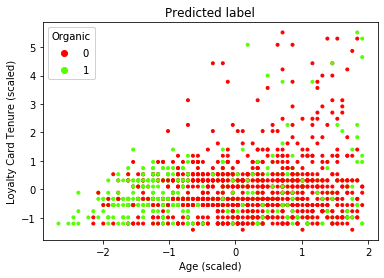

In [40]:
fig, ax = plt.subplots()
scatter = ax.scatter(X_test[:,5], X_test[:,6], c=y_pred_dtc, cmap='prism', marker=".")
legend1 = ax.legend(*scatter.legend_elements(), loc="upper left", title="Organic")
ax.add_artist(legend1)
plt.xlabel('Age (scaled)')
plt.ylabel('Loyalty Card Tenure (scaled)')
plt.title('Predicted label')
plt.show()

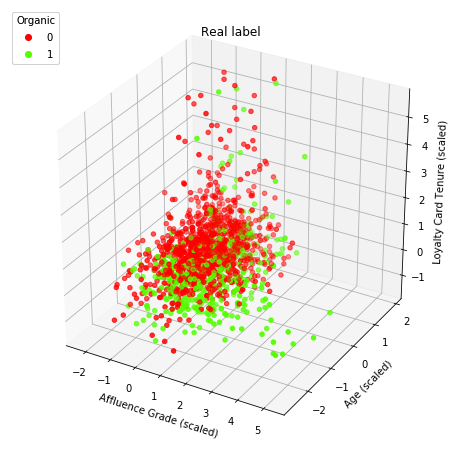

In [82]:
fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')
ax.scatter(xs=X_test[:,4], ys=X_test[:,5], zs=X_test[:,6], c=y_test, cmap='prism', marker="o")
legend1 = ax.legend(*scatter.legend_elements(), loc="upper left", title="Organic")
ax.add_artist(legend1)
ax.set_xlabel('Affluence Grade (scaled)')
ax.set_ylabel('Age (scaled)')
ax.set_zlabel('Loyalty Card Tenure (scaled)')
plt.title('Real label')
ax.grid(True)
plt.show()

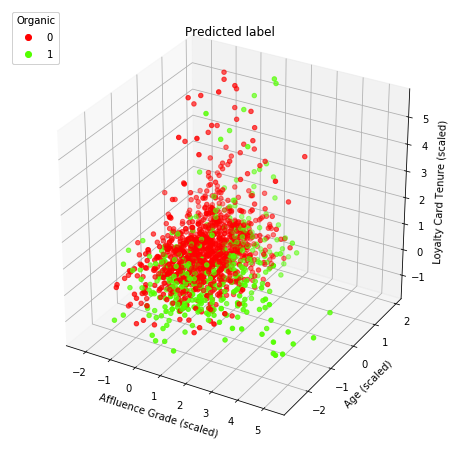

In [83]:
fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')
ax.scatter(xs=X_test[:,4], ys=X_test[:,5], zs=X_test[:,6], c=y_pred_dtc, cmap='prism', marker="o")
legend1 = ax.legend(*scatter.legend_elements(), loc="upper left", title="Organic")
ax.add_artist(legend1)
ax.set_xlabel('Affluence Grade (scaled)')
ax.set_ylabel('Age (scaled)')
ax.set_zlabel('Loyalty Card Tenure (scaled)')
plt.title('Predicted label')
ax.grid(True)
plt.show()